In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from scipy.stats import mannwhitneyu
nltk.download('all')

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/aimeeoh/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading pac

True

In [2]:
data = pd.read_csv('data/anthony-and-sonne-panini-shoppe/csv/detailed-reviews-of-anthony-and-sonne-panini-shoppe.csv')

df = data[['place_name', 'rating', 'review_text', 'published_at_date']]
df

,place_name,rating,review_text,published_at_date
0,Anthony & Son Panini Shoppe,5,Great,2024-02-26 20:16:14.572279
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024-02-26 20:16:14.586832
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024-02-25 20:16:14.596605
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024-02-25 20:16:14.602618
4,Anthony & Son Panini Shoppe,5,NaN,2024-02-25 20:16:14.610050
...,...,...,...,...
957,Anthony & Son Panini Shoppe,5,This shop feeds me almost every night. Great s...,2014-03-03 20:18:51.408169
958,Anthony & Son Panini Shoppe,5,like everything about this place. i think i tr...,2014-03-03 20:18:51.410891
959,Anthony & Son Panini Shoppe,5,Very good experience in this place. Been here ...,2014-03-03 20:18:51.413436
960,Anthony & Son Panini Shoppe,5,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...,2014-03-03 20:18:52.195873


Extracting Year from 'published_at_date' column

In [3]:
df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13619/2592446673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['published_at_date'] = pd.to_datetime(df['published_at_date']).dt.year


,place_name,rating,review_text,published_at_date
0,Anthony & Son Panini Shoppe,5,Great,2024
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024
4,Anthony & Son Panini Shoppe,5,NaN,2024
...,...,...,...,...
957,Anthony & Son Panini Shoppe,5,This shop feeds me almost every night. Great s...,2014
958,Anthony & Son Panini Shoppe,5,like everything about this place. i think i tr...,2014
959,Anthony & Son Panini Shoppe,5,Very good experience in this place. Been here ...,2014
960,Anthony & Son Panini Shoppe,5,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...,2014


Charts for ratings

<AxesSubplot:xlabel='rating'>

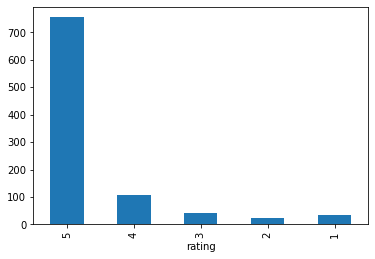

In [4]:
df['rating'].value_counts()[[5, 4, 3, 2, 1]].plot(kind='bar')

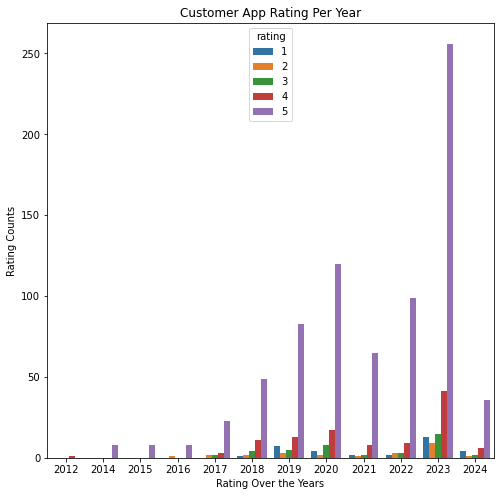

In [5]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'published_at_date', hue ='rating', data = df)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [6]:
df['review_text'] = df['review_text'].astype("string")

df[['review_text']]

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13619/2693296585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_text'] = df['review_text'].astype("string")


,review_text
0,Great
1,The best Italian sandwitch ever. I like the cl...
2,Nicest sandwich shop I ve ever been in. Anthon...
3,"Ehh, after all I heard I had really high hopes..."
4,<NA>
...,...
957,This shop feeds me almost every night. Great s...
958,like everything about this place. i think i tr...
959,Very good experience in this place. Been here ...
960,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...


In [7]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'Stopwords.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [8]:
prep = []

for text in df['review_text']:
    if pd.isna(text):
        prep.append('')
    else:
        prep.append(preprocess(text))

df['prep'] = prep

df.head()

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13619/1628437642.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prep'] = prep


,place_name,rating,review_text,published_at_date,prep
0,Anthony & Son Panini Shoppe,5,Great,2024,great
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024,italian sandwitch classic amthoni son sandwitc...
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024,nicest sandwich shop ve anthoni gentleman made...
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024,ehh heard high hope decent great tbh
4,Anthony & Son Panini Shoppe,5,<NA>,2024,


In [9]:
from collections import Counter
Counter(" ".join(df["prep"]).split()).most_common(50)

[('sandwich', 360),
 ('great', 149),
 ('food', 119),
 ('good', 112),
 ('place', 106),
 ('order', 80),
 ('delici', 77),
 ('panini', 67),
 ('servic', 64),
 ('hero', 59),
 ('fresh', 55),
 ('amaz', 52),
 ('brooklyn', 46),
 ('chicken', 44),
 ('anthoni', 43),
 ('back', 42),
 ('fdni', 40),
 ('staff', 40),
 ('recommend', 37),
 ('time', 36),
 ('make', 36),
 ('shop', 35),
 ('love', 35),
 ('italian', 34),
 ('friendli', 33),
 ('excel', 33),
 ('price', 32),
 ('sauc', 32),
 ('bread', 31),
 ('spot', 31),
 ('deli', 30),
 ('chees', 29),
 ('worth', 29),
 ('mozzarella', 28),
 ('menu', 27),
 ('option', 26),
 ('wait', 26),
 ('made', 24),
 ('awesom', 24),
 ('son', 23),
 ('super', 23),
 ('lunch', 22),
 ('tast', 22),
 ('cutlet', 22),
 ('eat', 22),
 ('nice', 22),
 ('godfath', 21),
 ('qualiti', 21),
 ('guy', 21),
 ('custom', 20)]

In [10]:
def create_sentiment(rating):
    
    if rating==1 or rating==2:
        return -1 # negative sentiment
    elif rating==4 or rating==5:
        return 1 # positive sentiment
    else:
        return 0 # neutral sentiment

df['sentiment'] = df['rating'].apply(create_sentiment)
df

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13619/1400198503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(create_sentiment)


,place_name,rating,review_text,published_at_date,prep,sentiment
0,Anthony & Son Panini Shoppe,5,Great,2024,great,1
1,Anthony & Son Panini Shoppe,5,The best Italian sandwitch ever. I like the cl...,2024,italian sandwitch classic amthoni son sandwitc...,1
2,Anthony & Son Panini Shoppe,5,Nicest sandwich shop I ve ever been in. Anthon...,2024,nicest sandwich shop ve anthoni gentleman made...,1
3,Anthony & Son Panini Shoppe,3,"Ehh, after all I heard I had really high hopes...",2024,ehh heard high hope decent great tbh,0
4,Anthony & Son Panini Shoppe,5,<NA>,2024,,1
...,...,...,...,...,...,...
957,Anthony & Son Panini Shoppe,5,This shop feeds me almost every night. Great s...,2014,shop feed night great sandwich excel sauc nute...,1
958,Anthony & Son Panini Shoppe,5,like everything about this place. i think i tr...,2014,place sandwich good pasta,1
959,Anthony & Son Panini Shoppe,5,Very good experience in this place. Been here ...,2014,good experi place coupl time enjoy sandwich,1
960,Anthony & Son Panini Shoppe,5,BEST SANDWICHES IN TOWN. - WHEN BUYING GOOD ...,2014,sandwich town buy good food price matter pay good,1


<AxesSubplot:xlabel='sentiment', ylabel='count'>

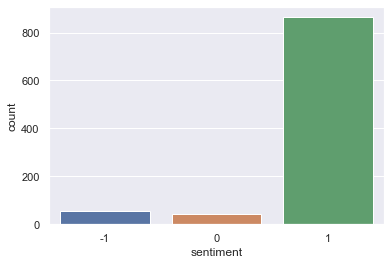

In [11]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [12]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return scores['compound']




# apply get_sentiment function

df['review_sentiment'] = df['prep'].apply(get_sentiment)

df['review_sentiment']

/var/folders/h6/vygxj7rj5tq9z54ggx6zd6080000gn/T/ipykernel_13619/3818571148.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review_sentiment'] = df['prep'].apply(get_sentiment)


0      0.6249
1      0.5994
2      0.6908
3      0.7906
4      0.0000
        ...  
957    0.8860
958    0.4404
959    0.7269
960    0.6705
961    0.9729
Name: review_sentiment, Length: 962, dtype: float64

<AxesSubplot:xlabel='sentiment', ylabel='count'>

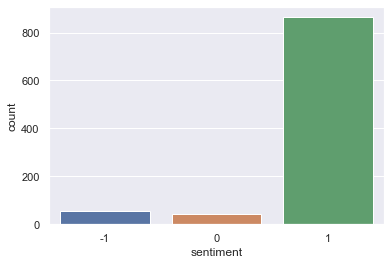

In [13]:
sns.set_theme()

# Create a visualization
sns.countplot(
    data=df,
    x="sentiment"
)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None, 
                        lowercase=False,
                        preprocessor=None)

X = tfidf.fit_transform(df['prep'])

years = df['published_at_date']

from sklearn.model_selection import train_test_split
y = df['sentiment'] # target variable
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X,y, years)

In [15]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=0)

clf.fit(X_train,y_train)

y_test_pred=clf.predict(X_test)

report=classification_report(y_test, y_test_pred, output_dict=True)
report

/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/aimeeoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'-1': {'precision': 1.0,
  'recall': 0.26666666666666666,
  'f1-score': 0.4210526315789474,
  'support': 15},
 '0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10},
 '1': {'precision': 0.9113924050632911,
  'recall': 1.0,
  'f1-score': 0.9536423841059603,
  'support': 216},
 'accuracy': 0.9128630705394191,
 'macro avg': {'precision': 0.6371308016877637,
  'recall': 0.4222222222222222,
  'f1-score': 0.4582316718949692,
  'support': 241},
 'weighted avg': {'precision': 0.8790902883554809,
  'recall': 0.9128630705394191,
  'f1-score': 0.880923420915235,
  'support': 241}}

In [16]:
from sklearn.metrics import accuracy_score
from scipy.stats import chi2_contingency

predictions_df = pd.DataFrame({'Sentiment': y_test_pred, 'Years': years_test})

# Create a contingency table
contingency_table = pd.crosstab(predictions_df['Sentiment'], predictions_df['Years'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Chi-square statistic:", chi2_stat)
print("Degrees of freedom:", dof)
print("p-value:", p_val)
print("Expected frequencies:\n", expected)
print("Contingency table:\n", contingency_table)

Chi-square statistic: 4.185032236650661
Degrees of freedom: 11
p-value: 0.9641882706549665
Expected frequencies:
 [[1.65975104e-02 3.31950207e-02 1.65975104e-02 3.31950207e-02
  9.95850622e-02 2.65560166e-01 5.31120332e-01 4.97925311e-01
  3.65145228e-01 4.97925311e-01 1.44398340e+00 1.99170124e-01]
 [9.83402490e-01 1.96680498e+00 9.83402490e-01 1.96680498e+00
  5.90041494e+00 1.57344398e+01 3.14688797e+01 2.95020747e+01
  2.16348548e+01 2.95020747e+01 8.55560166e+01 1.18008299e+01]]
Contingency table:
 Years      2012  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  \
Sentiment                                                                     
-1            0     0     0     0     0     0     1     0     0     0     3   
 1            1     2     1     2     6    16    31    30    22    30    84   

Years      2024  
Sentiment        
-1            0  
 1           12  


In [17]:
# Wilcoxon rank-sum / Mann-whitney U Test
year = 2020

before_data = df[df['published_at_date'] < year]
after_data = df[df['published_at_date'] >= year]

u_stat, p_value_mw = mannwhitneyu(before_data['review_sentiment'], after_data['review_sentiment'])
print("Mann-Whitney U test - U-statistic:", u_stat, "p-value:", p_value_mw)

Mann-Whitney U test - U-statistic: 90198.0 p-value: 0.12748317045381255


In [18]:
# make altered data into csv file
df.to_csv('altdata/' + 'panini.csv', index=False)